In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the pixel values to the range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape the data to add a channel dimension
print(x_train[0].shape)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


(28, 28)


In [3]:
model = models.Sequential([
    # Convolutional Layer 1
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    
    # Convolutional Layer 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Flatten and Dense Layers
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output layer (10 classes for digits 0-9)
])


c:\Users\HP 17\Documents\ING 3\S 5\AND\recognition-pca\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [5]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8948 - loss: 0.3393 - val_accuracy: 0.9772 - val_loss: 0.0731
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9827 - loss: 0.0554 - val_accuracy: 0.9870 - val_loss: 0.0389
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9887 - loss: 0.0361 - val_accuracy: 0.9827 - val_loss: 0.0536
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9920 - loss: 0.0244 - val_accuracy: 0.9892 - val_loss: 0.0341
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9945 - loss: 0.0167 - val_accuracy: 0.9903 - val_loss: 0.0327
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9946 - loss: 0.0155 - val_accuracy: 0.9899 - val_loss: 0.0346
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9971 - loss: 0.0102 - val_accuracy: 0.9901 - val_loss: 0.0319
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9973 - loss

In [6]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9890 - loss: 0.0424
Test Accuracy: 0.991599977016449


(28, 28, 1)
(1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


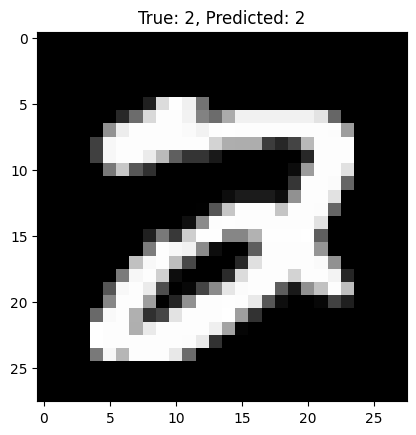

In [7]:
import numpy as np

# Pick a random test image
idx = np.random.randint(0, len(x_test))
test_image = x_test[idx]
test_label = y_test[idx]

# Predict the digit
print(test_image.shape)
print(test_image.reshape(1, 28, 28, 1).shape)
predicted_label = np.argmax(model.predict(test_image.reshape(1, 28, 28, 1)))

plt.imshow(test_image.reshape(28, 28), cmap='gray')
plt.title(f"True: {test_label}, Predicted: {predicted_label}")
plt.show()


In [8]:
# Save the model
model.save('backend/mnist_cnn_model.keras')

# Load the model
loaded_model = tf.keras.models.load_model('backend/mnist_cnn_model.keras')
